In [272]:
!pip install sweetviz

In [273]:
!pip install catboost

In [274]:
# Importing Libraries(Technologies)
from math import sqrt
from pandas_datareader import data 
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import datetime as dt
from datetime import date
import urllib.request,json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import sweetviz
import seaborn as sns

# Data Loading and Overview

In [275]:
df=pd.read_excel('https://github.com/ajtheb/Datasets/blob/master/Train_dataset.xlsx?raw=true')
dtest=pd.read_excel('https://github.com/ajtheb/Datasets/blob/master/Test_dataset.xlsx?raw=true')

In [ ]:
df.shape,dtest.shape

((7383, 15), (3331, 14))

In [ ]:
df.head(10)

Stock Index    Index  ... P/B Ratio  Stock Price
0         AA1     NYSE  ...      9.20   156.987852
1         AA2     NYSE  ...      6.91   560.859622
2         AA3     NYSE  ...      6.09  1279.732874
3         AA4      BSE  ...      5.60  1121.787632
4         AA5  S&P 500  ...      9.46   382.962534
5         AA6      BSE  ...      5.51   158.687016
6         AA7     NYSE  ...      8.60   209.645870
7         AA8      NSE  ...      6.73   861.481269
8         AA9      NSE  ...      6.46   514.240811
9        AA10      JSE  ...      4.42   239.085804

[10 rows x 15 columns]

In [ ]:
dtest.head()

Stock Index    Index  ... Put-Call Ratio  P/B Ratio
0      AC3235      NSE  ...           0.80       4.66
1      AC3236      JSE  ...           0.86       6.11
2      AC3237  S&P 500  ...           0.93       4.99
3      AC3238      NSE  ...           1.09       1.26
4      AC3239     NYSE  ...            NaN       6.18

[5 rows x 14 columns]

In [ ]:
df.describe()

VWAP  General Index  ...    P/B Ratio  Stock Price
count  7345.000000    7321.000000  ...  7358.000000  7383.000000
mean    486.188167   24218.079195  ...     4.996782   569.522650
std     278.280638   19602.174448  ...     2.616719   423.896621
min       5.250000    3351.280000  ...     0.450000    10.573482
25%     247.100000   11270.150000  ...     2.762500   223.516594
50%     488.380000   12765.840000  ...     5.020000   458.716483
75%     724.020000   38182.080000  ...     7.217500   827.927051
max     965.210000   55722.000000  ...     9.560000  1970.400563

[8 rows x 12 columns]

In [ ]:
dtest.describe()

VWAP  General Index  ...  Put-Call Ratio    P/B Ratio
count  3319.000000    3060.000000  ...     2902.000000  3193.000000
mean    488.572588   25099.383680  ...        0.938828     5.002543
std     281.559056   19886.618464  ...        0.201421     2.617696
min       5.490000    3351.280000  ...        0.600000     0.450000
25%     241.245000   11270.150000  ...        0.762500     2.700000
50%     488.410000   12765.840000  ...        0.930000     4.990000
75%     739.465000   38182.080000  ...        1.110000     7.230000
max     965.080000   55722.000000  ...        1.290000     9.560000

[8 rows x 11 columns]

In [ ]:
df.info(),dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

(None, None)

In [ ]:
df.isnull().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

In [ ]:
dtest.isnull().sum()

Stock Index             0
Index                   0
Industry                0
VWAP                    0
General Index           0
NAV                     0
P/E Ratio               0
Volumes Traded          0
Inventory Turnover      0
Covid Impact (Beta)     0
Tracking Error          0
Dollar Exchange Rate    0
Put-Call Ratio          0
P/B Ratio               0
dtype: int64

In [ ]:
my_report = sweetviz.analyze([df, "Train"])
my_report.show_html('Report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
df.groupby('Index')['Stock Price'].mean()

Index
BSE        574.138918
JSE        575.792186
NSE        561.128037
NYSE       563.350574
S&P 500    573.326250
Name: Stock Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d7234ea20>,
      dtype=object)

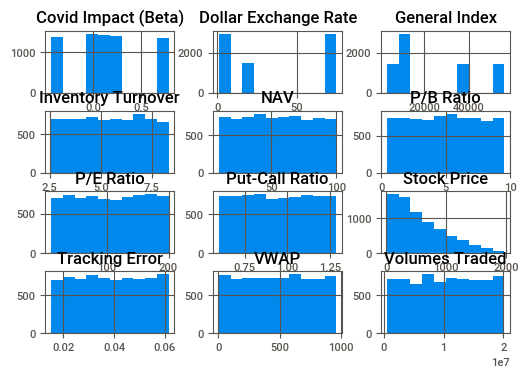

In [ ]:
df.hist()

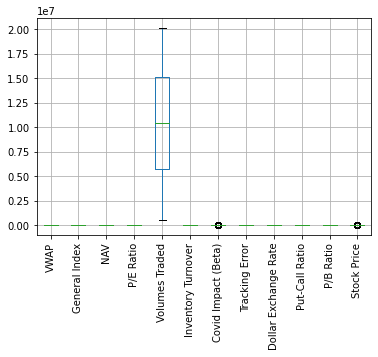

In [ ]:
df.boxplot(rot=90)

{'boxes': [<matplotlib.lines.Line2D at 0x7f741a101f60>],
 'caps': [<matplotlib.lines.Line2D at 0x7f741a10ca58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f741a0935c0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f741a093208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f741a10c2e8>,
  <matplotlib.lines.Line2D at 0x7f741a10c6a0>]}

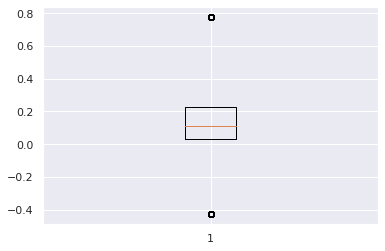

In [ ]:
plt.boxplot(df['Covid Impact (Beta)'])

In [ ]:
df.groupby('Industry')['P/B Ratio'].mean()# IT company have small assets, p/b highest

Industry
Energy              4.986135
Healthcare          4.978079
Information Tech    5.068487
Materials           4.961167
Real Estate         4.991734
Name: P/B Ratio, dtype: float64

In [ ]:
df.groupby('Industry')['P/E Ratio'].mean()

Industry
Energy              105.677781
Healthcare          105.434542
Information Tech    105.609732
Materials           106.282681
Real Estate         104.686234
Name: P/E Ratio, dtype: float64

(array([1699., 1620., 1178.,  902.,  682.,  492.,  386.,  239.,  140.,
          45.]),
 array([  10.57348188,  206.55618997,  402.53889805,  598.52160614,
         794.50431423,  990.48702232, 1186.4697304 , 1382.45243849,
        1578.43514658, 1774.41785467, 1970.40056275]),
 <a list of 10 Patch objects>)

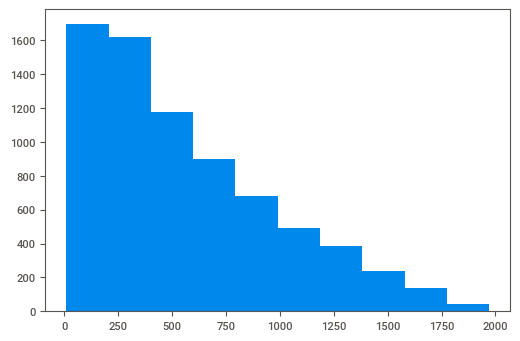

In [ ]:
x=df[~(df['Stock Price'].isnull())]['Stock Price']
plt.hist(x)

In [279]:
s=df['P/E Ratio'].isnull()
s=list(s[s==True].index)

In [ ]:
df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [276]:
fr=df[[ 'VWAP', 'General Index', 'NAV',
        'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price','P/E Ratio']]
tr=fr[~(fr['P/E Ratio'].isnull())]
tst=fr[fr['P/E Ratio'].isnull()][[ 'VWAP', 'General Index', 'NAV',
        'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price']]
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor 
  
X_train, X_test, y_train, y_test = train_test_split(tr[[ 
                                                        'VWAP', 'General Index', 'NAV',
        'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price']], tr['P/E Ratio'], test_size=0.2, random_state=123)
# create regressor object 
regressor = xgb.XGBRegressor() 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
pred=regressor.predict(X_test)
print("xgboost rmse ",sqrt(mean_squared_error(y_test,pred)))
print("r2 score ",r2_score(y_test,pred))   

[09:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost rmse  6.953351607795971
r2 score  0.9832857656625311


In [280]:
df.loc[s,'P/E Ratio']=regressor.predict(tst)


In [ ]:
t=df['NAV'].isnull()
t=list(t[t==True].index)

In [282]:
fr=df[[ 'VWAP', 'General Index', 'NAV',
        'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price','P/E Ratio']]
tr=fr[~(fr['NAV'].isnull())]
tst=fr[fr['NAV'].isnull()][[ 'VWAP', 'General Index',
        'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price','P/E Ratio']]
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor 
  
X_train, X_test, y_train, y_test = train_test_split(tr.drop('NAV',axis=1), tr['NAV'], test_size=0.2, random_state=123)
 # create regressor object 
regressor = xgb.XGBRegressor() 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
pred=regressor.predict(X_test)
print("xgboost rmse ",sqrt(mean_squared_error(y_test,pred)))
print("r2 score ",r2_score(y_test,pred))   

[09:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost rmse  3.2026304342823395
r2 score  0.9842744515011039


In [283]:
df.loc[t,'NAV']=regressor.predict(tst)

In [ ]:
u=df['Inventory Turnover'].isnull()
u=list(u[u==True].index)

In [ ]:
fr=df[['P/B Ratio','Stock Price']]
tr=fr[~(fr['P/B Ratio'].isnull())]
tst=fr[fr['P/B Ratio'].isnull()]['Stock Price']
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor 
  
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame({'Stock Price':tr['Stock Price']}), tr['P/B Ratio'], test_size=0.2, random_state=123)
 # create regressor object 
regressor = xgb.XGBRegressor() 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
pred=regressor.predict(X_test)
print("xgboost rmse ",sqrt(mean_squared_error(y_test,pred)))
print("r2 score ",r2_score(y_test,pred))   

[06:32:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost rmse  2.6231685137312035
r2 score  -0.005440810610820579


In [284]:
#inputing values
df['VWAP']=df['VWAP'].fillna(df['VWAP'].mean())
df['General Index']=df['General Index'].fillna(df['General Index'].mean())
#df['NAV']=df['NAV'].fillna(df['NAV'].mean())
#df['P/E Ratio']=df['P/E Ratio'].fillna(df['P/E Ratio'].mean())
df['Volumes Traded']=df['Volumes Traded'].fillna(df['Volumes Traded'].mean())
df['Inventory Turnover']=df['Inventory Turnover'].fillna(df['Inventory Turnover'].mean())
df['Covid Impact (Beta)']=df['Covid Impact (Beta)'].fillna(df['Covid Impact (Beta)'].mean())
df['Tracking Error']=df['Tracking Error'].fillna(df['Tracking Error'].mean())
df['Dollar Exchange Rate']=df['Dollar Exchange Rate'].fillna(df['Dollar Exchange Rate'].mean())
df['Put-Call Ratio']=df['Put-Call Ratio'].fillna(df['Put-Call Ratio'].mean())
df['P/B Ratio']=df['P/B Ratio'].fillna(df['P/B Ratio'].mean())

dtest['VWAP']=dtest['VWAP'].fillna(dtest['VWAP'].mean())
dtest['General Index']=dtest['General Index'].fillna(dtest['General Index'].mean())
dtest['NAV']=dtest['NAV'].fillna(dtest['NAV'].mean())
dtest['P/E Ratio']=dtest['P/E Ratio'].fillna(dtest['P/E Ratio'].mean())
dtest['Volumes Traded']=dtest['Volumes Traded'].fillna(dtest['Volumes Traded'].mean())
dtest['Inventory Turnover']=dtest['Inventory Turnover'].fillna(dtest['Inventory Turnover'].mean())
dtest['Covid Impact (Beta)']=dtest['Covid Impact (Beta)'].fillna(dtest['Covid Impact (Beta)'].mean())
dtest['Tracking Error']=dtest['Tracking Error'].fillna(dtest['Tracking Error'].mean())
dtest['Dollar Exchange Rate']=dtest['Dollar Exchange Rate'].fillna(dtest['Dollar Exchange Rate'].mean())
dtest['Put-Call Ratio']=dtest['Put-Call Ratio'].fillna(dtest['Put-Call Ratio'].mean())
dtest['P/B Ratio']=dtest['P/B Ratio'].fillna(dtest['P/B Ratio'].mean())

In [ ]:
df.isnull().any()

Stock Index             False
Index                   False
Industry                False
VWAP                    False
General Index           False
NAV                     False
P/E Ratio               False
Volumes Traded          False
Inventory Turnover      False
Covid Impact (Beta)     False
Tracking Error          False
Dollar Exchange Rate    False
Put-Call Ratio          False
P/B Ratio               False
Stock Price             False
dtype: bool

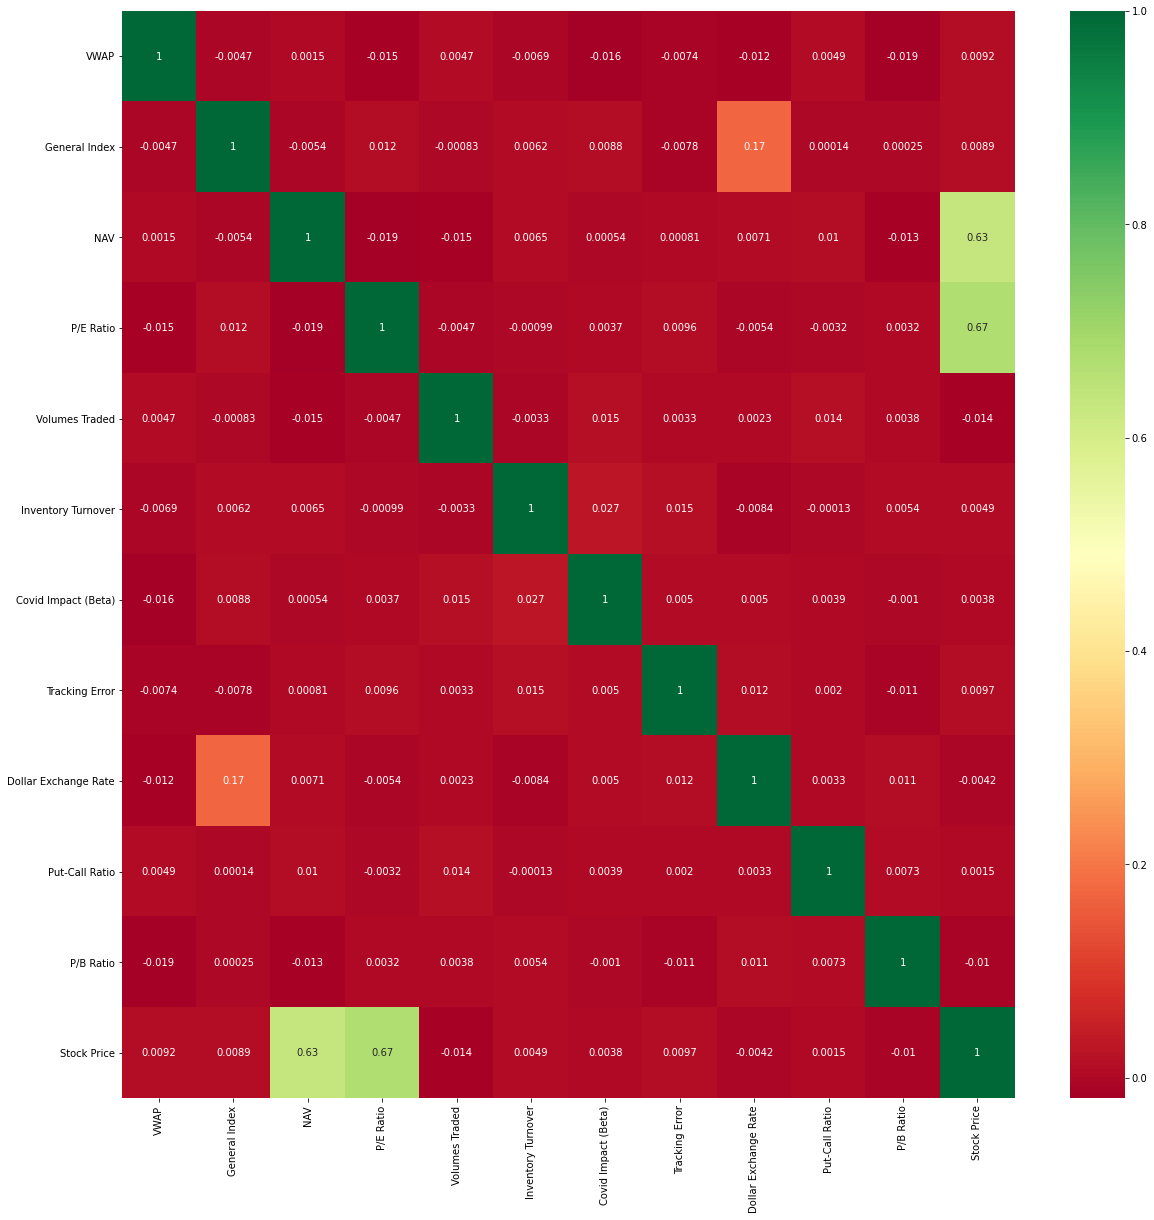

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr(method='kendall')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
df['Industry'].value_counts()

Energy              1521
Materials           1515
Real Estate         1475
Information Tech    1451
Healthcare          1421
Name: Industry, dtype: int64

In [ ]:
df[df['Put-Call Ratio']>0.7]['Stock Price'].mean()  #bearish price will go down

567.2436290798565

In [ ]:
df[df['Put-Call Ratio']<=0.7]['Stock Price'].mean() #bullish price will go up

583.1773545741461

In [ ]:
df[df['Dollar Exchange Rate']==1.0]['Index'].value_counts()

S&P 500    1458
NYSE       1454
Name: Index, dtype: int64

In [ ]:
df.groupby('Industry')['Covid Impact (Beta)'].value_counts()

Industry          Covid Impact (Beta)
Energy             0.110000              1431
                   0.140654                90
Healthcare         0.780000              1359
                   0.140654                62
Information Tech   0.230000              1389
                   0.140654                62
Materials          0.030000              1445
                   0.140654                70
Real Estate       -0.430000              1383
                   0.140654                92
Name: Covid Impact (Beta), dtype: int64

In [ ]:
pre={
    'Real Estate':4,
     'Materials':3,
     'Energy':2,
     'Information Tech':1,
     'Healthcare':0
}

In [ ]:
cat_features=[]
df.groupby('General Index')['Stock Price'].mean()

General Index
3351.280000     573.262513
11270.150000    562.630902
12765.840000    561.897875
24218.079195    570.513208
38182.080000    573.482623
55722.000000    576.402414
Name: Stock Price, dtype: float64

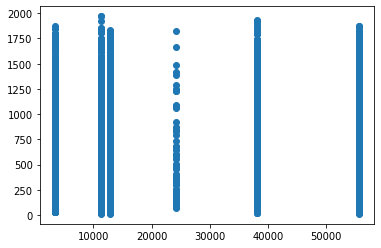

In [ ]:
plt.scatter(df['General Index'],df['Stock Price'])

In [ ]:
df['Index'].value_counts()#uniform

NSE        1498
JSE        1479
S&P 500    1476
NYSE       1468
BSE        1462
Name: Index, dtype: int64

In [ ]:
print(df[df['Index']=='NSE']['General Index'].value_counts())
print(df[df['Index']=='JSE']['General Index'].value_counts())
print(df[df['Index']=='S&P 500']['General Index'].value_counts())
print(df[df['Index']=='NYSE']['General Index'].value_counts())
print(df[df['Index']=='BSE']['General Index'].value_counts())

11270.150000    1485
24218.079195      13
Name: General Index, dtype: int64
55722.000000    1464
24218.079195      15
Name: General Index, dtype: int64
3351.280000     1461
24218.079195      15
Name: General Index, dtype: int64
12765.840000    1458
24218.079195      10
Name: General Index, dtype: int64
38182.080000    1453
24218.079195       9
Name: General Index, dtype: int64


In [ ]:
df['Stock Price'].describe()

count    7383.000000
mean      569.522650
std       423.896621
min        10.573482
25%       223.516594
50%       458.716483
75%       827.927051
max      1970.400563
Name: Stock Price, dtype: float64

In [ ]:
df[df['P/B Ratio']<1]['Stock Price'].describe() # feature

count     443.000000
mean      584.911562
std       412.230962
min        35.760747
25%       249.274438
50%       500.939271
75%       815.651876
max      1800.128111
Name: Stock Price, dtype: float64

In [ ]:
df.groupby('Industry')['Stock Price'].mean()

Industry
Energy              573.809305
Healthcare          574.440313
Information Tech    571.543941
Materials           556.091746
Real Estate         572.171414
Name: Stock Price, dtype: float64

In [ ]:
df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

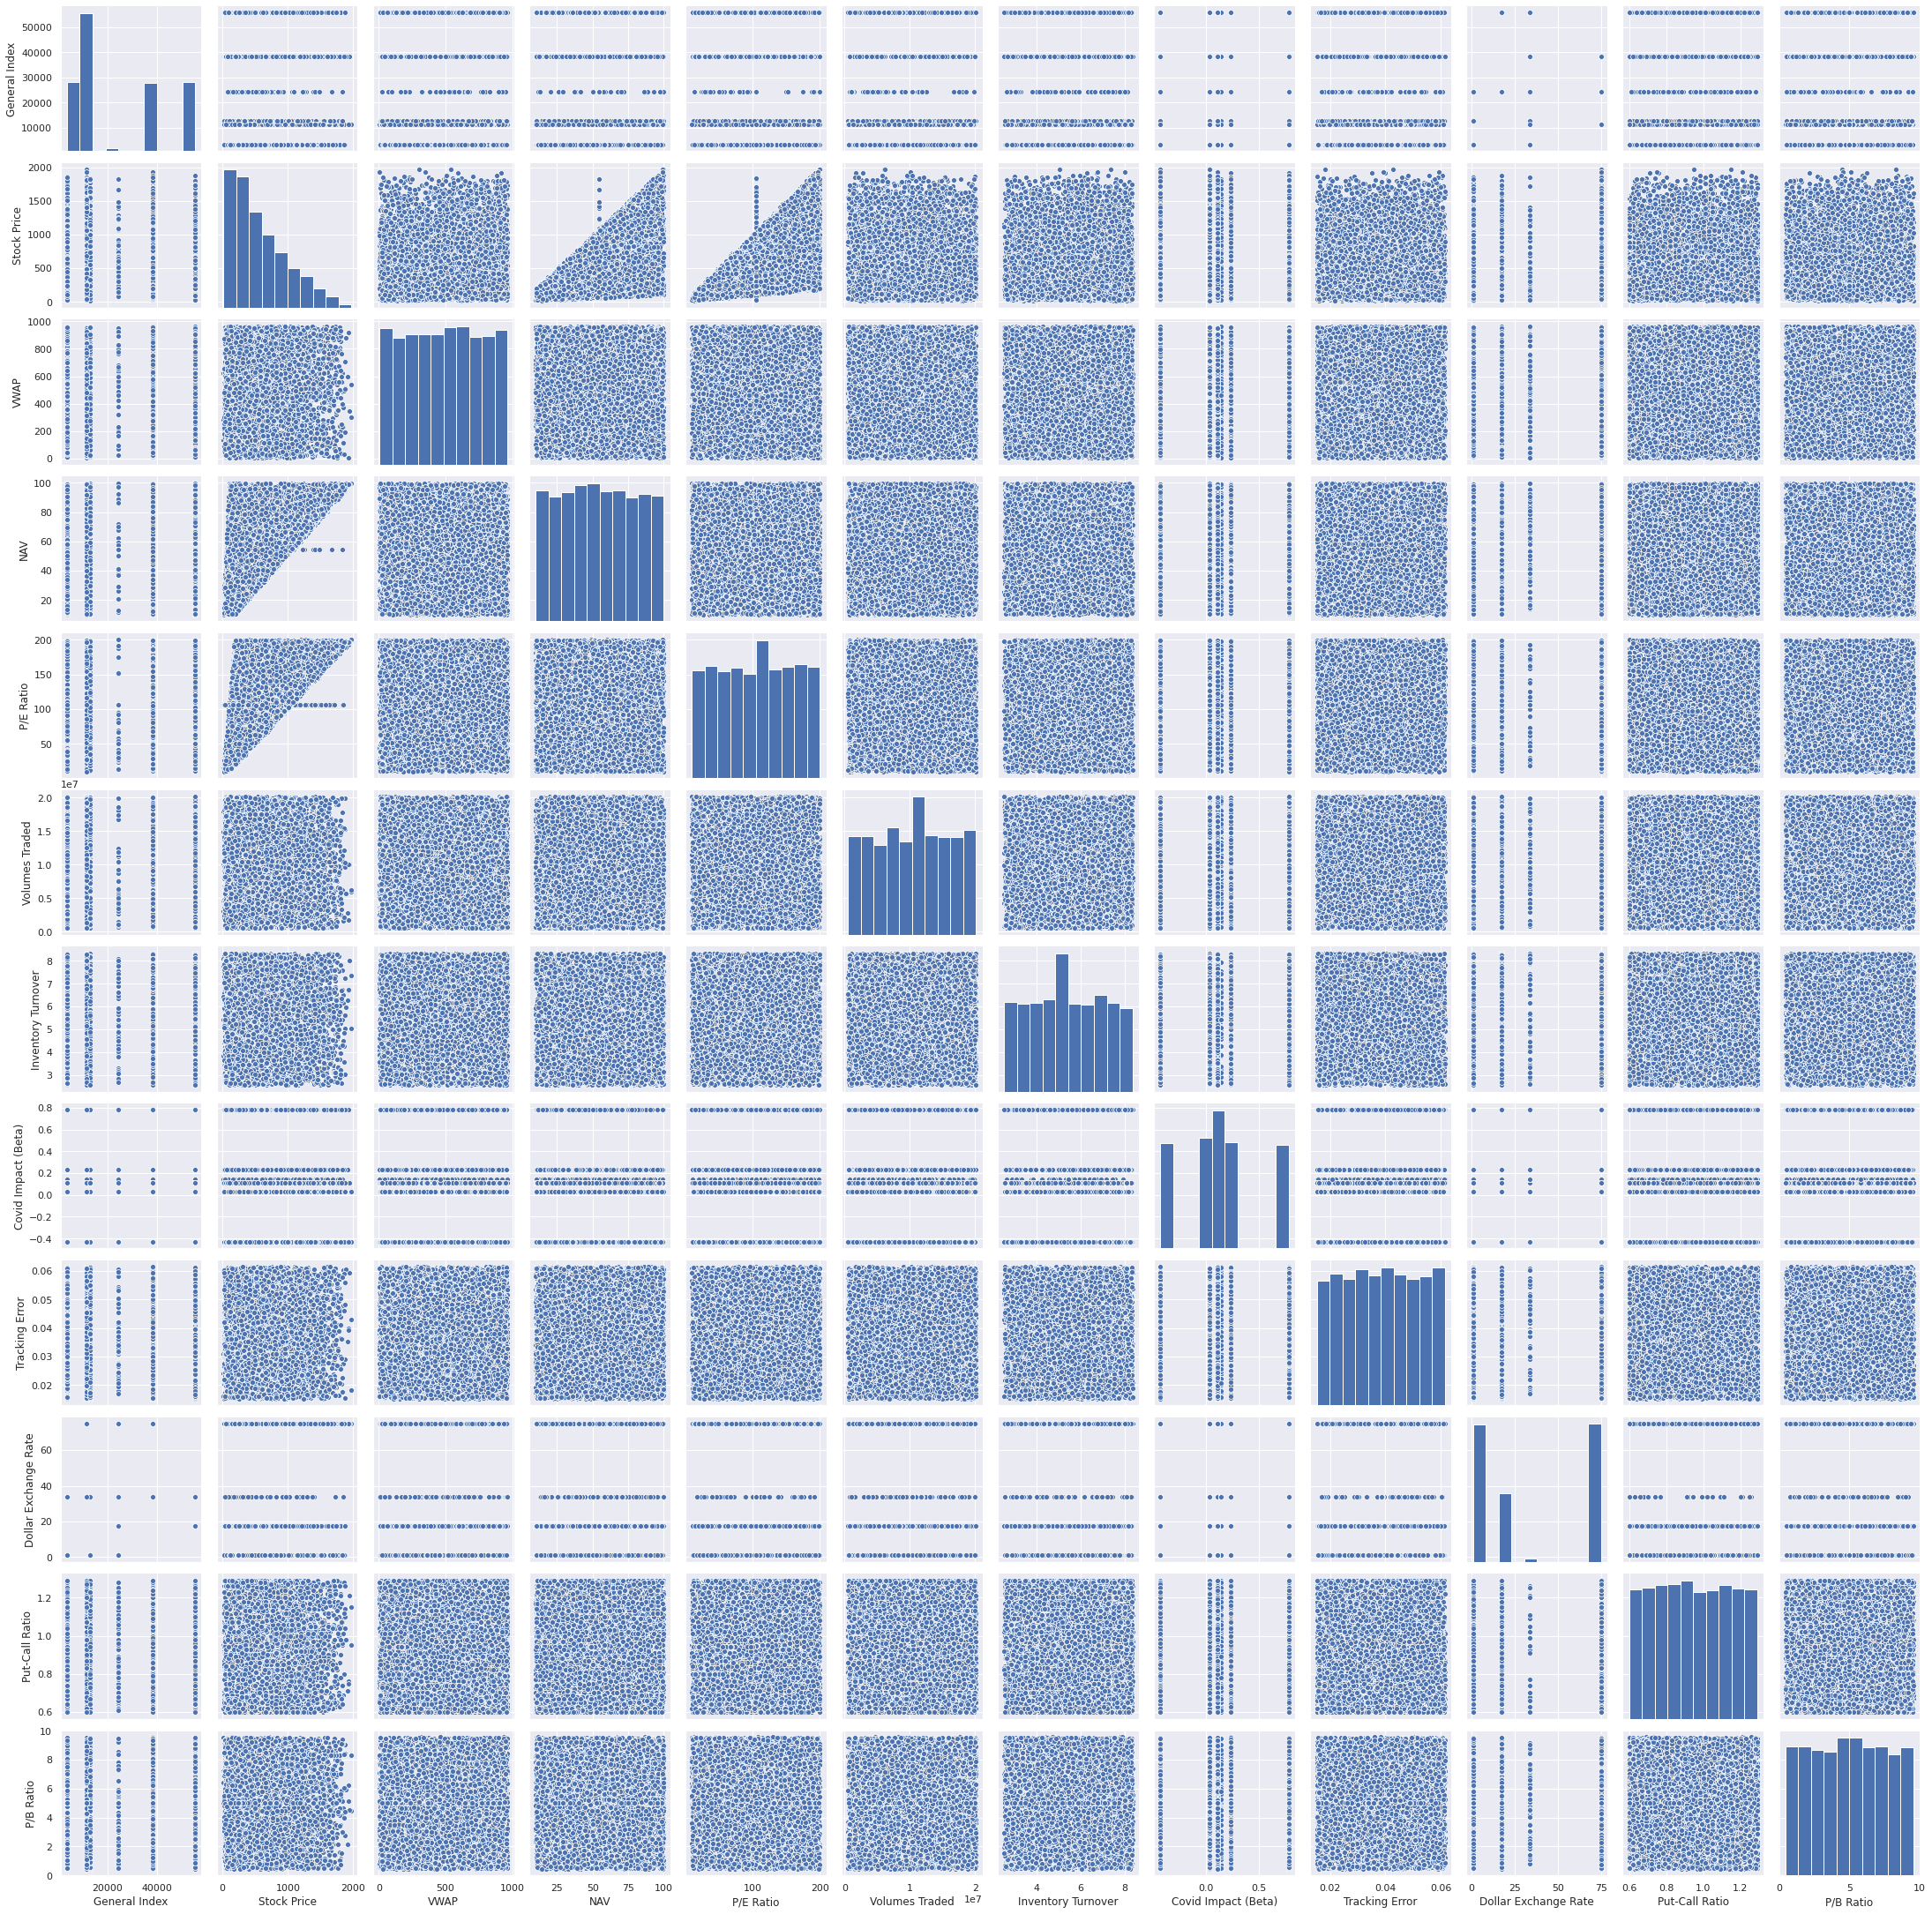

In [ ]:
#scatterplot
sns.set()
cols = ['Index','General Index','Stock Price','Industry', 'VWAP', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']
sns.pairplot(df[cols], height = 2.5)
plt.show();
#only 2 columns p/e ratio,NAV show good linear correlation

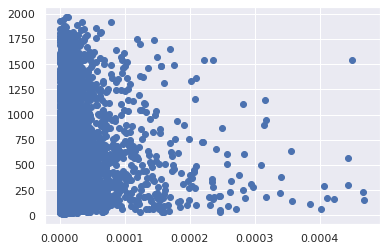

In [ ]:
plt.scatter(df['VWAP']/(df['Volumes Traded']*df['Inventory Turnover']),df['Stock Price'])

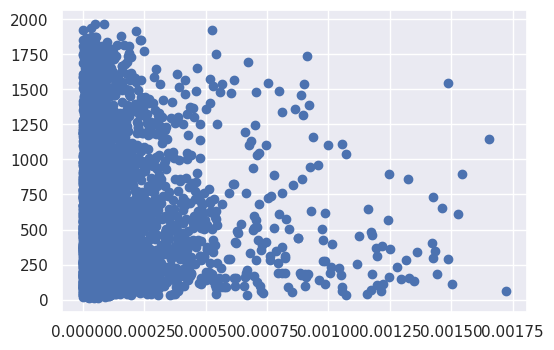

In [ ]:
plt.scatter(df['VWAP']/(df['Volumes Traded']),df['Stock Price'])

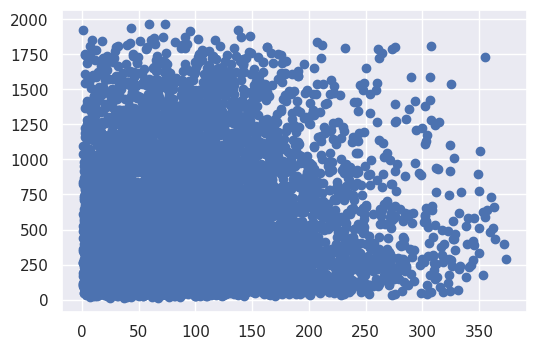

In [ ]:
plt.scatter(df['VWAP']/df['Inventory Turnover'],df['Stock Price'])

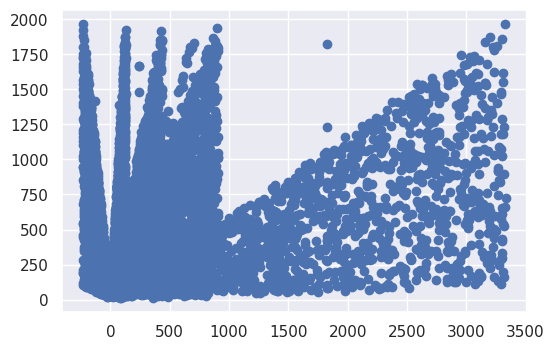

In [ ]:
plt.scatter(df['NAV']/df['Covid Impact (Beta)'],df['Stock Price'])

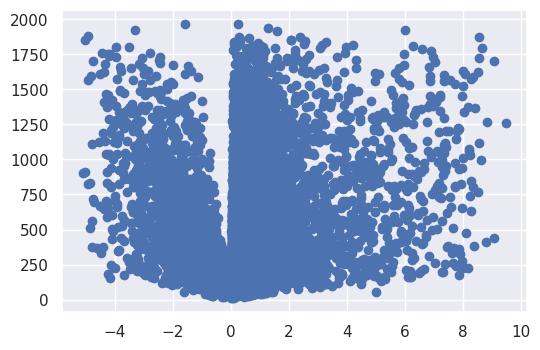

In [ ]:
plt.scatter(df['P/E Ratio']*df['Tracking Error']*df['Covid Impact (Beta)'],df['Stock Price'])

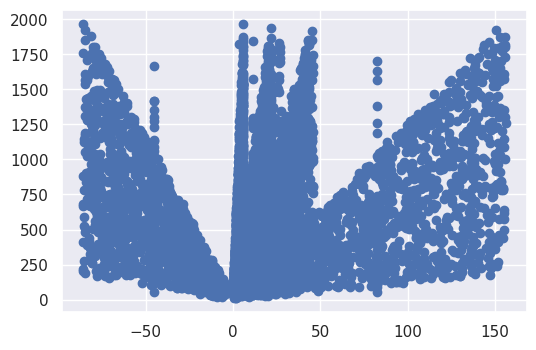

In [ ]:
plt.scatter(df['P/E Ratio']*df['Covid Impact (Beta)'],df['Stock Price'])

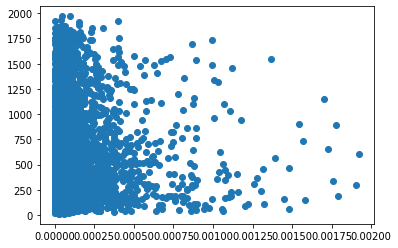

In [ ]:
plt.scatter(df['Put-Call Ratio']*df['VWAP']/df['Volumes Traded'],df['Stock Price'])

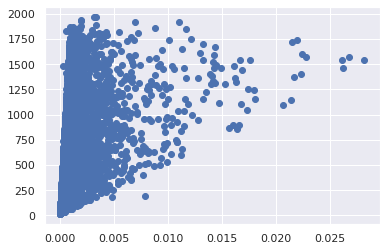

In [ ]:
plt.scatter(df['P/E Ratio']*df['NAV']/df['Volumes Traded'],df['Stock Price'])

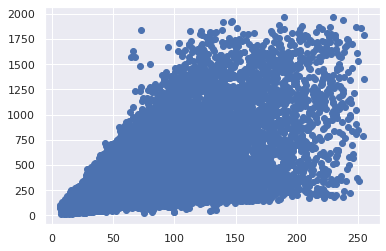

In [ ]:
plt.scatter(df['P/E Ratio']*df['Put-Call Ratio'],df['Stock Price'])

In [ ]:
abs(df.corr(method='pearson')['Stock Price']).sort_values(ascending=False)

Stock Price             1.000000
P/E Ratio               0.671608
NAV                     0.630054
Volumes Traded          0.013555
P/B Ratio               0.010058
Tracking Error          0.009731
VWAP                    0.009193
General Index           0.008897
Inventory Turnover      0.004929
Dollar Exchange Rate    0.004180
Covid Impact (Beta)     0.003806
Put-Call Ratio          0.001484
Name: Stock Price, dtype: float64

In [ ]:
exp.select_dtypes('object')

Stock Index    Index          Industry
0            AA1     NYSE       Real Estate
1            AA2     NYSE  Information Tech
2            AA3     NYSE  Information Tech
3            AA4      BSE         Materials
4            AA5  S&P 500       Real Estate
...          ...      ...               ...
7378      AC3230      NSE        Healthcare
7379      AC3231      JSE  Information Tech
7380      AC3232      JSE         Materials
7381      AC3233  S&P 500         Materials
7382      AC3234  S&P 500  Information Tech

[7383 rows x 3 columns]

In [ ]:
df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [ ]:
exp=pd.DataFrame()
exp['Stock Price']=df['Stock Price']
#exp.drop(['Index','Stock Index','Industry'],axis=1,inplace=True)
l=list(df.columns)
for x in l:
  if(x not in ['Index','Stock Index','Industry']):
    exp[x+'*nav']=df[x]*df['NAV']
    exp[x+'/nav']=df[x]/df['NAV']
abs(exp.corr(method='pearson')['Stock Price']).sort_values(ascending=False)

Stock Price                 1.000000
P/E Ratio*nav               0.986355
Stock Price*nav             0.955592
Stock Price/nav             0.701773
NAV*nav                     0.615971
Put-Call Ratio*nav          0.559209
Inventory Turnover*nav      0.520470
Put-Call Ratio/nav          0.499855
Tracking Error*nav          0.496766
Inventory Turnover/nav      0.469112
Tracking Error/nav          0.456267
Volumes Traded/nav          0.397845
P/B Ratio/nav               0.397369
P/B Ratio*nav               0.390577
VWAP*nav                    0.386811
Volumes Traded*nav          0.384720
VWAP/nav                    0.378179
General Index/nav           0.310091
General Index*nav           0.308205
Dollar Exchange Rate/nav    0.266779
Dollar Exchange Rate*nav    0.237691
P/E Ratio/nav               0.145560
Covid Impact (Beta)/nav     0.117809
Covid Impact (Beta)*nav     0.107993
NAV/nav                          NaN
Name: Stock Price, dtype: float64

In [ ]:
exp=pd.DataFrame()
exp['Stock Price']=df['Stock Price']
#exp.drop(['Index','Stock Index','Industry'],axis=1,inplace=True)
l=list(df.columns)
for x in l:
  if(x not in ['Index','Stock Index','Industry']):
    exp[x+'*p/e']=df[x]*df['P/E Ratio']
    exp[x+'/p/e']=df[x]/df['P/E Ratio']
abs(exp.corr(method='pearson')['Stock Price']).sort_values(ascending=False)

Stock Price                 1.000000
NAV*p/e                     0.986355
Stock Price*p/e             0.954697
P/E Ratio*p/e               0.650641
Stock Price/p/e             0.632792
Put-Call Ratio*p/e          0.610442
Inventory Turnover*p/e      0.568354
Tracking Error*p/e          0.540116
Put-Call Ratio/p/e          0.486506
Inventory Turnover/p/e      0.470601
Tracking Error/p/e          0.462846
VWAP*p/e                    0.436043
P/B Ratio*p/e               0.431593
Volumes Traded*p/e          0.424301
P/B Ratio/p/e               0.414641
Volumes Traded/p/e          0.408488
VWAP/p/e                    0.394644
General Index*p/e           0.341770
General Index/p/e           0.334943
Dollar Exchange Rate/p/e    0.296121
NAV/p/e                     0.278616
Dollar Exchange Rate*p/e    0.273189
Covid Impact (Beta)/p/e     0.134236
Covid Impact (Beta)*p/e     0.123340
P/E Ratio/p/e                    NaN
Name: Stock Price, dtype: float64

**Baseline Model**

In [ ]:
df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [285]:
X=df[[ 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
y=df['Stock Price']

Xt=dtest[[ 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
pred=regressor.predict(X_test)
print("random forest rmse ",sqrt(mean_squared_error(y_test,pred)))
print("r2 score ",r2_score(y_test,pred))   

random forest rmse  10.233493844184753
r2 score  0.9994114764143669


In [287]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xgbr1=xgb.XGBRegressor()
xgbr1.fit(X_train,y_train)
pred=xgbr1.predict(X_test)
print("xgb rmse ",sqrt(mean_squared_error(y_test,pred)))
print("r2 score ",r2_score(y_test,pred))

[09:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb rmse  16.520527447015727
r2 score  0.998466217336379


In [288]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
cbr = CatBoostRegressor(logging_level='Silent', random_state=45, 
                        early_stopping_rounds=100,learning_rate=0.01 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

cbr.fit(X_train, y_train,  plot=True)#cat_features=[0,1,2,3,5,6,7],
pred=cbr.predict(X_test)

print("cbr rmse ",sqrt(mean_squared_error(y_test,pred)))
print("r2 score ",r2_score(y_test,pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

cbr rmse  7.425676984236998
r2 score  0.9996901238767006


In [291]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10,shuffle=True, random_state=7)
results = cross_val_score(cbr, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 99.97% (0.01%)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10,shuffle=True, random_state=7)
results = cross_val_score(cbr, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 99.39% (0.23%)


**Feature Generation**

In [ ]:
Df=df.copy()

In [ ]:
Df.head()

Stock Index    Index  ... P/B Ratio  Stock Price
0         AA1     NYSE  ...      9.20   156.987852
1         AA2     NYSE  ...      6.91   560.859622
2         AA3     NYSE  ...      6.09  1279.732874
3         AA4      BSE  ...      5.60  1121.787632
4         AA5  S&P 500  ...      9.46   382.962534

[5 rows x 15 columns]

In [ ]:
s=Df['P/B Ratio']<1
s=s[s==True]
go=list(s.index)
Df['p/b1']=0
Df.loc[go,'p/b1']=1

s=dtest['P/B Ratio']<1
s=s[s==True]
go=list(s.index)
dtest['p/b1']=0
dtest.loc[go,'p/b1']=1

In [ ]:
Df['pe*Pc']=Df['P/E Ratio']*Df['Put-Call Ratio']
Df['pe/c']=Df['P/E Ratio']/df['Covid Impact (Beta)']
Df['pe*iv']=Df['P/E Ratio']*Df['Inventory Turnover']
Df['pe*tra']=Df['P/E Ratio']*Df['Tracking Error']

dtest['pe*Pc']=dtest['P/E Ratio']*dtest['Put-Call Ratio']
dtest['pe/c']=dtest['P/E Ratio']/dtest['Covid Impact (Beta)']
dtest['pe*iv']=dtest['P/E Ratio']*dtest['Inventory Turnover']
dtest['pe*tra']=dtest['P/E Ratio']*dtest['Tracking Error']

In [ ]:
Df['nav*pc']=Df['NAV']*df['Put-Call Ratio']
Df['nav*iv']=Df['NAV']*df['Inventory Turnover']
Df['nav*tra']=Df['NAV']*df['Tracking Error']

dtest['nav*pc']=dtest['NAV']*dtest['Put-Call Ratio']
dtest['nav*iv']=dtest['NAV']*dtest['Inventory Turnover']
dtest['nav*tra']=dtest['NAV']*dtest['Tracking Error']

In [ ]:
Df['vwap/v*i']=Df['VWAP']/(df['Volumes Traded']*df['Inventory Turnover'])


Df['covid_dollar']=Df['Dollar Exchange Rate']/Df['Covid Impact (Beta)']

dtest['vwap/v*i']=dtest['VWAP']/(dtest['Volumes Traded']*dtest['Inventory Turnover'])


dtest['covid_dollar']=dtest['Dollar Exchange Rate']/dtest['Covid Impact (Beta)']


In [ ]:
Df['index_gen']=Df['Index'].astype('str')+'_'+Df['General Index'].astype('str')
x=pd.get_dummies(Df['index_gen'],drop_first=True)
Df=pd.concat([Df,x],axis=1)

dtest['index_gen']=dtest['Index'].astype('str')+'_'+dtest['General Index'].astype('str')
x=pd.get_dummies(dtest['index_gen'],drop_first=True)
dtest=pd.concat([dtest,x],axis=1)

In [ ]:
Df['pe*nav']=Df['P/E Ratio']*Df['NAV']

dtest['pe*nav']=dtest['P/E Ratio']*dtest['NAV']

In [ ]:
Df['Industry']=Df['Industry'].map(pre)

dtest['Industry']=dtest['Industry'].map(pre)

In [ ]:
Df['i*p/b']=(Df['Industry']+1)*(Df['P/B Ratio'])
Df['nav*p/b']=(Df['NAV'])*(Df['P/B Ratio'])
Df['p/e*p/b']=Df['P/B Ratio']*Df['P/E Ratio']

dtest['i*p/b']=(dtest['Industry']+1)*(dtest['P/B Ratio'])
dtest['nav*p/b']=(dtest['NAV'])*(dtest['P/B Ratio'])
dtest['p/e*p/b']=dtest['P/B Ratio']*dtest['P/E Ratio']

In [ ]:
x1=pd.get_dummies(df['Industry'],drop_first=True)

In [ ]:
Df=pd.concat([Df,x1],axis=1)

In [ ]:
s1=Df['Put-Call Ratio']>0.7
s1=list(s1[s1==True].index)
s2=~(Df['Put-Call Ratio']>0.7)
s2=list(s2[s2==True].index)
Df['bearish/bullish']=0
Df.loc[s2,'bearish/bullish']=1

s1=dtest['Put-Call Ratio']>0.7
s1=list(s1[s1==True].index)
s2=~(dtest['Put-Call Ratio']>0.7)
s2=list(s2[s2==True].index)
dtest['bearish/bullish']=0
dtest.loc[s2,'bearish/bullish']=1

In [ ]:
abs(Df.corr(method='pearson')['Stock Price']).sort_values(ascending=False)

Stock Price                   1.000000
pe*nav                        0.995678
P/E Ratio                     0.688594
NAV                           0.634695
pe*Pc                         0.626466
pe*iv                         0.583880
nav*pc                        0.563470
pe*tra                        0.555027
nav*iv                        0.524557
nav*tra                       0.500417
p/e*p/b                       0.443103
nav*p/b                       0.393214
pe/c                          0.201998
NYSE_24218.079195466962       0.017866
NSE_24218.079195466962        0.017842
covid_dollar                  0.014284
Volumes Traded                0.013555
bearish/bullish               0.013161
P/B Ratio                     0.010058
Tracking Error                0.009731
vwap/v*i                      0.009598
VWAP                          0.009193
p/b1                          0.009173
NYSE_12765.84                 0.008923
General Index                 0.008897
i*p/b                    

In [ ]:
Df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price', 'p/b1', 'pe*Pc', 'pe/c',
       'pe*iv', 'pe*tra', 'nav*pc', 'nav*iv', 'nav*tra', 'vwap/v*i',
       'covid_dollar', 'index_gen', 'BSE_38182.08', 'JSE_24218.079195466962',
       'JSE_55722.0', 'NSE_11270.15', 'NSE_24218.079195466962',
       'NYSE_12765.84', 'NYSE_24218.079195466962',
       'S&P 500_24218.079195466962', 'S&P 500_3351.28', 'pe*nav', 'i*p/b',
       'nav*p/b', 'p/e*p/b', 'bearish/bullish'],
      dtype='object')

In [ ]:
X1=Df[[ 'VWAP', 'NAV',
       'P/E Ratio', 
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'a', 'b', 'c',
       'p/b1',  'BSE_38182.08', 'JSE_24218.079195466962',
       'JSE_55722.0', 'NSE_11270.15', 'NSE_24218.079195466962',
       'NYSE_12765.84', 'NYSE_24218.079195466962',
       'S&P 500_24218.079195466962', 'S&P 500_3351.28','Industry','f','g']]
y1=Df['Stock Price']

In [ ]:
X1=Df[['Industry', 'NAV',
       'P/E Ratio', 'Inventory Turnover',
        'Tracking Error',
         'vwap/v*i',
       'pe/c', 'covid_dollar', 'BSE_38182.08',
       'JSE_24218.079195466962', 'JSE_55722.0', 'NSE_11270.15',
       'NSE_24218.079195466962', 'NYSE_12765.84', 'NYSE_24218.079195466962',
       'S&P 500_24218.079195466962', 'pe*nav', 'i*p/b',
       'nav*p/b', 'pe*tra','Put-Call Ratio','pe*Pc','bearish/bullish']]
y1=Df['Stock Price']

In [ ]:
X1=Df[['Industry', 'NAV',
       'P/E Ratio', 'Inventory Turnover',
        'Tracking Error',
         'vwap/v*i',
       'pe/c', 'covid_dollar', 'BSE_38182.08',
       'JSE_24218.079195466962', 'JSE_55722.0', 'NSE_11270.15',
       'NSE_24218.079195466962', 'NYSE_12765.84', 'NYSE_24218.079195466962',
       'S&P 500_24218.079195466962', 'pe*nav', 'i*p/b',
       'nav*p/b', 'Pet','Put-Call Ratio','pe*Pc','bearish/bullish']]
y1=Df['Stock Price']

In [ ]:
X1=Df[[ 'Industry', 'VWAP',  'NAV',
       'P/E Ratio', 'Inventory Turnover',
        'Tracking Error', 
          'pe*Pc', 'pe/c',
       'pe*iv', 'pe*tra', 'nav*pc', 'nav*iv', 'nav*tra', 'vwap/v*i',
       'covid_dollar',  'BSE_38182.08', 'JSE_24218.079195466962',
       'JSE_55722.0', 'NSE_11270.15', 'NSE_24218.079195466962',
       'NYSE_12765.84', 'NYSE_24218.079195466962',
        'pe*nav', 'i*p/b',
       'nav*p/b', 'bearish/bullish']]
y1=Df['Stock Price']

In [ ]:
np.log(2.73)

#plt.hist(y1)

1.0043016091968684

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=123)
xgbr1=xgb.XGBRegressor()
xgbr1.fit(X_train1,y_train1)
pred=xgbr1.predict(X_test1)

print("xgb rmse ",sqrt(mean_squared_error(y_test1,pred)))
print("r2 score ",r2_score(y_test1,pred))

[04:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb rmse  66.7944197926519
r2 score  0.974927573294245


In [ ]:
!pip install catboost

In [ ]:
X1=Df[[ 'VWAP',  'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio','bearish/bullish']]
y1=Df['Stock Price']

In [ ]:
from catboost import CatBoostRegressor

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=123)
cbr = CatBoostRegressor(logging_level='Silent', random_state=45, 
                        early_stopping_rounds=100,learning_rate=0.01 )
cbr.fit(X_train1, y_train1,  plot=True,eval_set=(X_test1,y_test1))
pred=cbr.predict(X_test1)

print("cbr rmse ",sqrt(mean_squared_error(y_test1,pred)))
print("r2 score ",r2_score(y_test1,pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

cbr rmse  27.06645624695479
r2 score  0.9958830195616744


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10,shuffle=True, random_state=7)
results = cross_val_score(xgbr1, X1, y1, cv=kfold)
print("Accuracy: %.3f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 99.391% (0.23%)


In [ ]:
X1.index

RangeIndex(start=0, stop=7383, step=1)

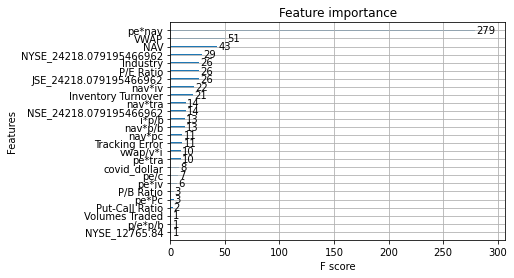

In [ ]:
from xgboost import plot_importance
plot_importance(xgbr1)

In [ ]:
print(pd.DataFrame({"actual":y_test,"predicted":pred}))

           actual    predicted
3274   175.928229   175.069962
3782   577.274496   576.082092
1582   190.038731   184.760529
309    133.263602   134.781097
1849  1359.970917  1357.636230
...           ...          ...
1482   157.857002   153.869125
7267   419.053056   420.555573
3659   762.808378   770.440430
6702   530.754833   531.547424
5127   400.963097   404.933563

[1477 rows x 2 columns]


Catboost 

# Parameter Tuning


In [ ]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20] ,
 "max_depth"        : [ 3,4,5,6,8,10,13,15],
 "min_child_weight" : [  3,5, 6,9 ,11,14,19],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ,0.5],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,0.9 ],
 "num_boost_round": [10, 25, 50,80,100,150],
  "n_estimators" :[50,100,200,300,500] 
}

In [ ]:
xg_reg = xgb.XGBRegressor()

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(xg_reg,param_distributions=params,n_iter=5,n_jobs=1,cv=4,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable
random_search.best_score_

In [ ]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, num_boost_round=10, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(), 
param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train1,y_train1)
gsearch1.best_params_, gsearch1.best_score_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[07:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'max_depth': 3, 'min_child_weight': 5}, 0.9718981251444877)

In [ ]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBRegressor(), 
param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train1,y_train1)
gsearch2.best_params_, gsearch2.best_score_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[07:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'max_depth': 3, 'min_child_weight': 5}, 0.9718981251444877)

In [ ]:
param_test2b = {
 'min_child_weight':[6,7,8,9]
}
gsearch2b = GridSearchCV(estimator = xgb.XGBRegressor(max_depth=3), 
 param_grid = param_test2b,n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X_train1,y_train1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[07:53:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid=False, n_jobs=4, param_grid={'min_child_weight': [6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scorin

In [ ]:
gsearch2b.best_params_, gsearch2b.best_score_

({'min_child_weight': 6}, 0.9717414618839781)

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBRegressor(max_depth=3,min_child_weight=5), 
 param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train1,y_train1)
gsearch3.best_params_, gsearch3.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[07:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'gamma': 0.0}, 0.9718300519901625)

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(4,12)],
 'colsample_bytree':[i/10.0 for i in range(4,12)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBRegressor(max_depth=3,min_child_weight=5), 
 param_grid = param_test4, n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train1,y_train1)
gsearch4.best_params_, gsearch4.best_score_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[07:56:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'colsample_bytree': 1.0, 'subsample': 1.0}, 0.9718300519901625)

In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(5,20,5)],
 'colsample_bytree':[i/100.0 for i in range(5,20,5)]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBRegressor(max_depth=3,min_child_weight=5), 
 param_grid = param_test5, n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train1,y_train1)
gsearch5.best_params_, gsearch5.best_score_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[07:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'colsample_bytree': 0.15, 'subsample': 0.15}, 0.956121708239387)

In [ ]:
param_test6 = {
 'reg_alpha':[0.01,0.05,0.02,0.001]
}
gsearch6 = GridSearchCV(estimator = xgb.XGBRegressor(max_depth=3,min_child_weight=5), 
 param_grid = param_test6,n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train1,y_train1)
gsearch6.best_params_, gsearch6.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[07:57:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'reg_alpha': 0.01}, 0.9718642369864359)

In [ ]:
xgbr2=xgb.XGBRegressor(max_depth=3,min_child_weight=1,reg_alpha=0.02,n_estimators=125,learning_rate=0.05)
xgbr2.fit(X_train1,y_train1)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10,shuffle=True, random_state=7)
results = cross_val_score(xgbr2, X1, y1, cv=kfold)
print("Accuracy: %.3f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[07:57:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:57:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:57:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:57:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:57:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:57:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

even after parameter tuning of xg boost , i found catboost regressor with better accuracy of approx 99.4%

In [292]:
f1=cbr.predict(Xt)

In [293]:
subt1=pd.DataFrame({
    "Stock Index":dtest['Stock Index'],
    "Stock Price":f1
})
subt1.to_csv('submission_task1.csv',index=False)

In [ ]:
subt1.head()

Stock Index  Stock Price
0      AC3235   800.993491
1      AC3236   247.661034
2      AC3237  1550.209184
3      AC3238   802.684021
4      AC3239   265.714208

# **Task 2**

In [294]:
time_df=pd.read_excel('https://github.com/ajtheb/Datasets/blob/master/Test_dataset.xlsx?raw=true',sheet_name=1)

In [295]:
time_df.head()

Stock Index       Put-Call Ratio  ...           Unnamed: 5           Unnamed: 6
0         NaN  2020-08-10 00:00:00  ...  2020-08-14 00:00:00  2020-08-15 00:00:00
1      AC3235                  0.8  ...             0.901211             0.898368
2      AC3236                 0.86  ...              1.01704              1.02926
3      AC3237                 0.93  ...                  NaN              1.18196
4      AC3238                 1.09  ...              1.46106                1.531

[5 rows x 7 columns]

In [296]:
time_df=time_df.rename({'Put-Call Ratio':'2020-08-10 00:00:00',
                'Unnamed: 2':'2020-08-11 00:00:00',
                'Unnamed: 3':'2020-08-12 00:00:00',
                'Unnamed: 4':'2020-08-13 00:00:00',
                'Unnamed: 5':'2020-08-14 00:00:00',
                'Unnamed: 6':'2020-08-15 00:00:00'},axis=1)
time_df=time_df.drop([0])

In [297]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3331 entries, 1 to 3331
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Stock Index          3331 non-null   object
 1   2020-08-10 00:00:00  2902 non-null   object
 2   2020-08-11 00:00:00  3329 non-null   object
 3   2020-08-12 00:00:00  3274 non-null   object
 4   2020-08-13 00:00:00  3317 non-null   object
 5   2020-08-14 00:00:00  3226 non-null   object
 6   2020-08-15 00:00:00  3092 non-null   object
dtypes: object(7)
memory usage: 208.2+ KB


In [ ]:
time_df.isnull().sum()

Stock Index              0
2020-08-10 00:00:00    429
2020-08-11 00:00:00      2
2020-08-12 00:00:00     57
2020-08-13 00:00:00     14
2020-08-14 00:00:00    105
2020-08-15 00:00:00    239
dtype: int64

In [298]:
time_df.isnull().sum(axis=1).max()

4

In [299]:
l=['2020-08-10 00:00:00', '2020-08-11 00:00:00','2020-08-12 00:00:00', '2020-08-13 00:00:00', '2020-08-14 00:00:00',
       '2020-08-15 00:00:00']
for x in l:
  time_df[x]=time_df[x].astype('float64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f947eda0898>,
      dtype=object)

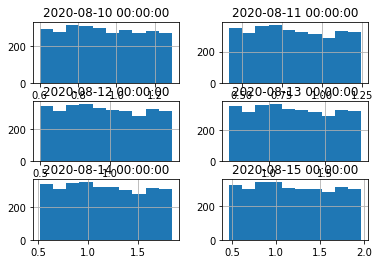

In [300]:
time_df.hist()

In [ ]:
time_df.describe()

2020-08-10 00:00:00  ...  2020-08-15 00:00:00
count          2902.000000  ...          3092.000000
mean              0.938828  ...             1.201216
std               0.201421  ...             0.441742
min               0.600000  ...             0.462070
25%               0.762500  ...             0.811109
50%               0.930000  ...             1.181962
75%               1.110000  ...             1.574630
max               1.290000  ...             1.967298

[8 rows x 6 columns]

In [301]:
#imputing values row wise
s=time_df.isnull().any(axis=1)
s=s[s==True]
l=list(s.index)
for x in l:
  time_df.loc[x]=time_df.loc[x].fillna(time_df.loc[x,'2020-08-10 00:00:00':'2020-08-15 00:00:00'].mean())

In [302]:
time_df.head()

Stock Index  2020-08-10 00:00:00  ...  2020-08-14 00:00:00  2020-08-15 00:00:00
1      AC3235             0.800000  ...             0.901211             0.898368
2      AC3236             0.860000  ...             1.017042             1.029258
3      AC3237             0.930000  ...             1.017101             1.181962
4      AC3238             1.090000  ...             1.461062             1.531000
5      AC3239             1.464914  ...             1.615504             1.705519

[5 rows x 7 columns]

In [303]:
time_df.isnull().any()

Stock Index            False
2020-08-10 00:00:00    False
2020-08-11 00:00:00    False
2020-08-12 00:00:00    False
2020-08-13 00:00:00    False
2020-08-14 00:00:00    False
2020-08-15 00:00:00    False
dtype: bool

In [304]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
n_features = 1
n_steps=4
X, y = split_sequence(time_df.loc[1,'2020-08-10 00:00:00':'2020-08-14 00:00:00'], n_steps)
print(X,y)

[[0.8 0.6599999999999999 0.7723999999999999 0.9832239999999999]] [0.90121088]


In [305]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

pred=[]
X=[]
Y=[]
for x in range(time_df.shape[0]):
  # reshape from [samples, timesteps] into [samples, timesteps, features]
  n_features = 1
  n_steps=5
  x, y = split_sequence(time_df.loc[x+1,'2020-08-10 00:00:00':'2020-08-15 00:00:00'], n_steps)
  x=x.astype('float32')
  x=x.astype('float32')
  X.append(x)
  Y.append(y[0])
X=np.array(X)
Y=np.array(Y)


In [ ]:
X.shape,Y.shape

((3331, 1, 5), (3331, 1))

In [ ]:
X,Y

(array([[[0.8       ],
         [0.66      ],
         [0.7724    ],
         [0.983224  ],
         [0.9012109 ]],
 
        [[0.86      ],
         [0.732     ],
         [0.85448   ],
         [1.0866448 ],
         [1.0170422 ]],
 
        [[0.93      ],
         [0.816     ],
         [0.95024   ],
         [1.2073025 ],
         [1.0171008 ]],
 
        ...,
 
        [[0.67      ],
         [0.504     ],
         [0.59456   ],
         [0.7591456 ],
         [0.65024304]],
 
        [[0.79      ],
         [0.648     ],
         [0.75872   ],
         [0.9659872 ],
         [0.8819057 ]],
 
        [[0.74      ],
         [0.588     ],
         [0.69032   ],
         [0.8798032 ],
         [0.7853796 ]]], dtype=float32),
 array([0.89836829, 1.02925766, 1.18196192, ..., 0.61477467, 0.8765534 ,
        0.76747893]))

In [306]:
# split into train and test sets(68:32 ratio)
#[samples,timesteps,features]
n_train_hours = int(X.shape[0]*0.75)

train_X = X[:n_train_hours, :]
test_X = X[n_train_hours:, :]

train_y=Y[:n_train_hours]
test_y=Y[n_train_hours:]

train_X = train_X.reshape((train_X.shape[0], 5, 1))
test_X = test_X.reshape((test_X.shape[0], 5, 1))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((2498, 5, 1), (2498,), (833, 5, 1), (833,))

Epoch 1/180
35/35 - 1s - loss: 0.9630 - val_loss: 0.4799
Epoch 2/180
35/35 - 0s - loss: 0.2351 - val_loss: 0.1399
Epoch 3/180
35/35 - 0s - loss: 0.1256 - val_loss: 0.0843
Epoch 4/180
35/35 - 0s - loss: 0.1181 - val_loss: 0.0689
Epoch 5/180
35/35 - 0s - loss: 0.1265 - val_loss: 0.0770
Epoch 6/180
35/35 - 0s - loss: 0.0905 - val_loss: 0.0636
Epoch 7/180
35/35 - 0s - loss: 0.1080 - val_loss: 0.0464
Epoch 8/180
35/35 - 0s - loss: 0.0942 - val_loss: 0.0555
Epoch 9/180
35/35 - 0s - loss: 0.1116 - val_loss: 0.0490
Epoch 10/180
35/35 - 0s - loss: 0.0877 - val_loss: 0.0547
Epoch 11/180
35/35 - 0s - loss: 0.1046 - val_loss: 0.0453
Epoch 12/180
35/35 - 0s - loss: 0.0876 - val_loss: 0.0538
Epoch 13/180
35/35 - 0s - loss: 0.1049 - val_loss: 0.0458
Epoch 14/180
35/35 - 0s - loss: 0.0841 - val_loss: 0.0526
Epoch 15/180
35/35 - 0s - loss: 0.1005 - val_loss: 0.0438
Epoch 16/180
35/35 - 0s - loss: 0.0870 - val_loss: 0.0506
Epoch 17/180
35/35 - 0s - loss: 0.1048 - val_loss: 0.0462
Epoch 18/180
35/35 - 0s

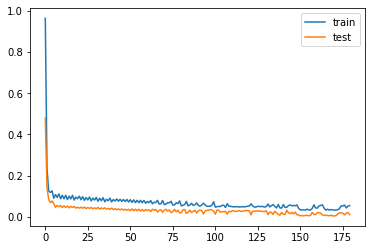

In [307]:

#X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(5,1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')
# fit model
#model.fit(X, Y, epochs=150, verbose=0)
history = model.fit(train_X, train_y, epochs=180, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [308]:
# make a prediction
yhat = model.predict(test_X)
print(yhat.shape)
rmse = sqrt(mean_squared_error(test_y,yhat))
print('Test RMSE: %.3f' % rmse)

(833, 1)
Test RMSE: 0.014


In [309]:
 from sklearn.metrics import r2_score
 r2_score(test_y, yhat)

0.9989720193514762

In [310]:
com=pd.DataFrame(list(zip(test_y,yhat)),columns=['Actual','Predicted'])
com.iloc[15:35,:]

Actual     Predicted
15  0.505700   [0.5270303]
16  0.658404   [0.6622793]
17  1.116517   [1.1121838]
18  0.963813  [0.95879287]
19  1.923668   [1.8906105]
20  0.745664   [0.7450147]
21  0.832924  [0.82933515]
22  1.356481   [1.3515399]
23  0.963813  [0.95879287]
24  1.596445   [1.5850203]
25  1.792779   [1.7703339]
26  1.291036   [1.2867064]
27  1.007443   [1.0025128]
28  1.181962   [1.1778439]
29  1.029258   [1.0243926]
30  1.334666   [1.3299943]
31  0.767479    [0.766097]
32  0.854739    [0.850642]
33  1.945483   [1.9103935]
34  1.683704   [1.6680804]

In [311]:
testset=time_df.loc[:,'2020-08-11 00:00:00':'2020-08-15 00:00:00']

In [312]:
testset.shape
testset=np.array(testset)

In [313]:
testset.shape

(3331, 5)

In [314]:
testset=testset.reshape(3331,5,1)

In [315]:
pct2=model.predict(testset)

In [316]:
dt2=dtest.copy()

In [317]:
dt2['Put-Call Ratio']=pct2

In [318]:
Xt2=dt2[[ 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]

In [319]:
st2=cbr.predict(Xt2)

In [320]:
subt2=pd.DataFrame({
    "Stock Index":dtest['Stock Index'],
    "Stock Price":st2
})
subt2.to_csv('submission_task2.csv',index=False)

In [ ]:
subt2.head()

Stock Index  Stock Price
0      AC3235   800.539996
1      AC3236   247.226066
2      AC3237  1550.550513
3      AC3238   801.257774
4      AC3239   263.525023

In [ ]:
subt1.head()

Stock Index  Stock Price
0      AC3235   802.767602
1      AC3236   255.270518
2      AC3237  1552.099771
3      AC3238   821.453931
4      AC3239   264.779394